# Split data sets

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data,iris.target

print('X:')
print(X[:5,:])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [2]:
from sklearn.model_selection import train_test_split
#split into training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## SVM

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

#X軸、Y軸共に,０〜１の一様分布から１００個の点をサンプリング
X0 = np.random.uniform(size=(100,2))
#クラス０用のラベル作成
y0=np.repeat(0,100)
#同様に−１〜０でサンプリング
X1= np.random.uniform(-1.0,0.0,size=(100,2))
y1= np.repeat(1,100)

fig,ax=plt.subplots()
ax.scatter(X0[:,0],X0[:,1], marker='o', label='class 0')
ax.scatter(X1[:,0],X1[:,1], marker='x', label='class 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from sklearn.svm import SVC
#visualize learning,decision boundary,margin,sv
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    svc = SVC(kernel=kernel,C=C)
    
    #learning
    svc.fit(np.vstack((X0,X1)), np.hstack((y0,y1)))
    
    fig,ax=plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker='o', label='class 0')
    ax.scatter(X1[:,0],X1[:,1],marker='x', label='class 1')
    
    #plot decision boundary and margin
    xx,yy=np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,
              colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot sv
    ax.scatter(svc.support_vectors_[:,0],
              svc.support_vectors_[:,1],
              s=250,facecolors='none',edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

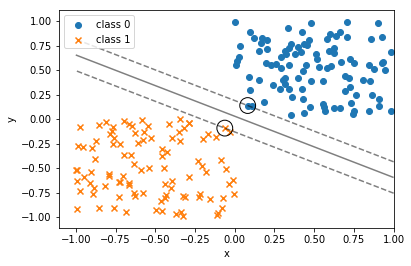

In [5]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=1e6)

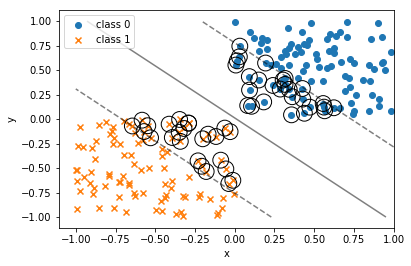

In [6]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=0.1)

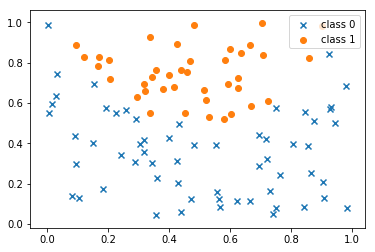

In [7]:
np.random.seed(123)
X = np.random.random(size=(100,2))
y = (X[:,1] > 2*(X[:,0]-0.5)**2 + 0.5).astype(int)
fig,ax = plt.subplots()
ax.scatter(X[y == 0,0], X[y == 0,1], marker='x',label='class 0')
ax.scatter(X[y == 1,0], X[y == 1,1], marker='o',label='class 1')
ax.legend()
plt.show()

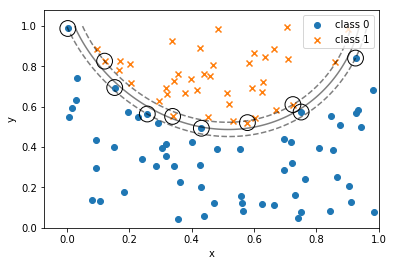

In [8]:
X0,X1=X[y == 0,:],X[y==1,:]
y0,y1=y[y==0],y[y==1]
plot_boundary_margin_sv(X0,y0,X1,y1, kernel='rbf',C=1e3,xmin=0,ymin=0)

## decision tree

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X,y=iris.data,iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### ※For visualize, GraphViz is needed to install separately
### random forest is ensemble of decision trees

## Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X,y = boston.data, boston.target
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.3,random_state=123)

lr = LinearRegression()
lr.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_pred = lr.predict(X_te)

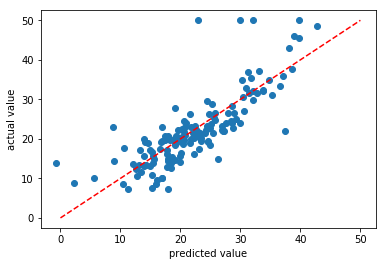

In [16]:
import matplotlib.pyplot as plt
#axis x is prediction, axis y is fact
fig,ax = plt.subplots()
ax.scatter(y_pred,y_te)
ax.plot((0,50),(0,50),linestyle='dashed',color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

# PCA

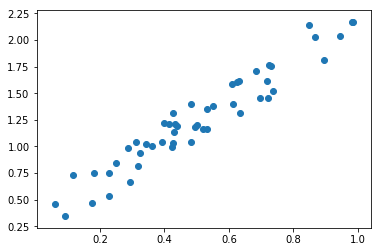

In [21]:
import numpy as mp 
import matplotlib.pyplot as plt
np.random.seed(123)

X = np.random.random(size=50)
Y = 2*X + 0.5*np.random.rand(50)
fig,ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

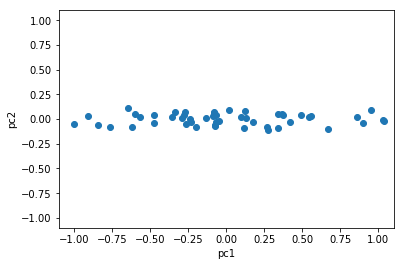

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.hstack((X[:,np.newaxis],Y[:,np.newaxis])))

fig,ax = plt.subplots()
ax.scatter(X_pca[:,0],X_pca[:,1])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
plt.show()

# model evaluation

In [23]:
#カテゴリの分類精度について
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
iris = load_iris()
X,y = iris.data[:100,:],iris.target[:100]
xl,xt,yl,yt= train_test_split(X,y,test_size=0.3,random_state=123)
svc = SVC()
svc.fit(xl,yl)
yp= svc.predict(xt)

# 適合率、再現率、F値出力
print(classification_report(yt,yp))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        30



In [24]:
#予測確率の正確さについて
#ROC曲線、AUCを使う　割愛


# Optimize parameter

In [25]:
#グリッドサーチ＝パラメータの候補を複数指定し、もっとも予測精度の良い値を選択する手法

# Clustering

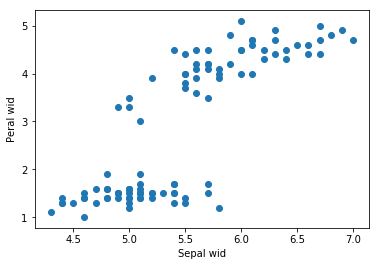

In [27]:
#k-means
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data
X=data[:100,[0,2]]

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(X[:,0],X[:,1])
ax.set_xlabel('Sepal wid')
ax.set_ylabel('Peral wid')
plt.show()

In [28]:
from sklearn.cluster import KMeans
#クラスタ数３のKMeansインスタンス
km = KMeans(n_clusters=3,init='random',n_init=10,random_state=123)
ykm=km.fit_predict(X)



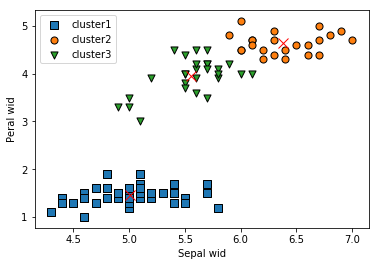

In [31]:
import numpy as np
fig, ax = plt.subplots()
#scatter of cluster1
ax.scatter(X[ykm ==0,0],X[ykm == 0,1],s=50,edgecolor='black',marker='s',label='cluster1')
#cluster center1
ax.plot(np.mean(X[ykm == 0,0]),np.mean(X[ykm == 0,1]),marker='x',markersize=10,color='red')
#scatter of cluster2
ax.scatter(X[ykm ==1,0],X[ykm == 1,1],s=50,edgecolor='black',marker='o',label='cluster2')
#cluster center2
ax.plot(np.mean(X[ykm == 1,0]),np.mean(X[ykm == 1,1]),marker='x',markersize=10,color='red')
#scatter of cluster3
ax.scatter(X[ykm ==2,0],X[ykm == 2,1],s=50,edgecolor='black',marker='v',label='cluster3')
#cluster center3
ax.plot(np.mean(X[ykm == 2,0]),np.mean(X[ykm == 2,1]),marker='x',markersize=10,color='red')

ax.set_xlabel('Sepal wid')
ax.set_ylabel('Peral wid')
ax.legend()
plt.show()